# Базовая модель

## Описание модели

В модели присутствуют два вида агентов – **n** продавцов и **m** покупателей. В модели рассматривается только один вид товара, все продавцы хотят его продать, все покупатели его купить.

## Продавцы

У каждого продавца **s** определено минимальное значение цены **s.min_price**, за которую он готов продать товар. Ниже этой цены продавцу невыгодно продавать товар. У разных продавцов значение **s.min_price** может быть разным. У каждого продавца значение **s.min_price** определяется в начале процесса моделирование как случайное число, равномерно распределенное на отрезке **[saller_min, saller_max]**. Величины **saller_min** и **saller_max** одинаковы для всех продавцов и являются параметрами модели.

Также у каждого продавца **s** есть значение ожидаемой цены продажи **s.expect_price**, которая всегда больше или равна, чем **s.min_price**. Изначально **s.expect_price** равно **saller_max**, но в дальнейшем может уменьшаться или увеличиваться на величину **saller_delta**, одинаковую для всех продавцов и являющейся параметром модели. Изменение **s.expect_price** происходит после взаимодействия данного продавца **s** с покупателем. Правила данного изменения будут описаны ниже.


## Покупатели

У каждого покупателя **с** определено максимальное значение цены **c.max_price**, за которую он готов купить товар. Выше этой цены покупателю невыгодно покупать товар. У разных покупателей значение **c.max_price** может быть разным. У каждого покупателя значение **c.min_price** определяется в начале процесса моделирования как случайное число, равномерно распределенное на отрезке **[consumer_min ,consumer_max]**. Величины **consumer_min** и **consumer_max** одинаковы для всех продавцов и являются параметрами модели.
Также у каждого покупателя есть значение ожидаемой цены продажи **c.expect_price**, которая всегда меньше или равна, чем **c.max_price**. Изначально **c.expect_price** равно **0**, но в дальнейшем может уменьшаться или увеличиваться на величину **consumer_delta**, одинаковую для всех покупателей и являющейся параметром модели. Изменение **c.expect_price** происходит после взаимодействия данного покупателя c продавцом. Правила данного изменения будут описаны ниже.


## Взаимодействие

На каждом шаге моделирования случайным равновероятным образом выбирается один продавец **s** и один покупатель **c**. Между ними происходит попытка заключения сделки.

Если **s.expect_price** меньше или равно **c.expect_price** покупателя, то:
1. сделка происходит,
2. **s.expect_price** увеличивается на **s.delta**,
3. **c.expect_price** уменьшается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки удовлетворяют ожиданиям как продавца, так и покупателя. Реальная стоимость купли-продажи может быть определена как **(s.expect_price + c.expect_price) / 2**, однако в данной модели эта величина никак не учитывается.

При этом продавец считает, что если он сейчас продал товар за стоимость как минимум **s.expect_price**, то в дальнейшем он может его продать немного дороже и **s.expect_price** можно немного увеличить.

А покупатель считает, что он купил сейчас товар за стоимость не более **c.expect_price**, то в дальнейшем он может покупать товар немного дешевле и **c.expect_price** можно немного уменьшить.

Если **s.expect_price** больше, чем **c.expect_price** покупателя, то:
1. сделка не происходит,
2. **s.expect_price** уменьшается на **s.delta**,
3. **c.expect_price** увеличивается на **c.delta**.
Такое поведение объясняется тем, что текущие ожидания от сделки не удовлетворяют ожиданиям как продавца, так и покупателя.

При этом продавец считает, что если он сейчас не продал товар за стоимость **s.expect_price**, то для продажи в следующий раз **s.expect_price** надо немного уменьшить.

А покупатель считает, что если он сейчас не смог купить товар за **c.expect_price**, то для покупки в следующий раз **c.expect_price** надо немного увеличить.


## Анализ


Модель на каждом такте должна учитывать:
1. Среднее значение **s.expect_price** по всем продавцам,
2. Минимальное значение **s.expect_price** по всем продавцам,
3. Среднее значение **с.expect_price** по всем покупателям,
4. Максимальное значение **с.expect_price** по всем покупателям,
5. Долю состоявшихся сделок на данный момент.

## Параметры модели


* **n** - количество продавцов,
* **m** - количество покупателей,
* **[saller_min, saller_max]** – интервал, из которого определяется **s.min_price** для каждого продавца,
* **saller_delta** - величина изменения ожидаемой цены у покупателя,
* **[consumer_min ,consumer_max]** – интервал, из которого определяется **с.max_price** для каждого покупателя,
* **consumer_delta** - величина изменения ожидаемой цены у продавца.


## Технические требования


* Модель должна быть построена в объектно-ориентированном подходе. Каждый вид агента описывается определенным классом, а каждый агент, соответственно, является объектом данного класса.
* Модель также является классом, в конструктор которого передаются все параметры модели.
* Модель должна иметь метод **run(n)**, который моделирует **n** последующих шагов модели

## Построение графиков

* Модель должна иметь метод **plot_dynamics(i,j)**, который строит графики анализа поведения моделей на интервале шагов с **i** по **j**.
* Модель должна иметь метод **plot_supply_and_demand(i)**, который строит графики спроса и предложения в момент времени **i**.

## Построение графа (схемы)


Модель должна иметь метод **plot_graph(i, j)**, который строит и визуализирует граф, в котором вершинами являются продавцы и покупатели, а ребра обозначают количество совершенных или не совершенных между ними сделок в периоде с **i** по **j**. Покупатели обозначены синим цветом, продавцы обозначены пурпурным. Зеленые ребра обозначают удачные сделки между продавцом и покупателем. Красные ребра обозначают неудачные сделки. Толщина ребра показывает количество сделок между данными продавцом и покупателем относительно общего количества сделок.

# Реализация базовой модели

## Подключение библиотек

In [35]:
import random
import matplotlib.pyplot as plt
from tqdm import trange # Модуль для визуализации прогресс-бара при запуске модели
import graphviz # Модуль для визуализации графов

## Реализация базовой модели

In [36]:
def mean(lst):
    return sum(lst)/len(lst)


class Model:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta



## Запуск модели

In [37]:
random.seed(42)
model = Model(num_of_consumers=3,
              num_of_sellers=3,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
model.run(1000)

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 250806.35it/s]


## Визуализация модели

In [38]:

model.plot_graph(100, 200)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

## Результаты моделирования

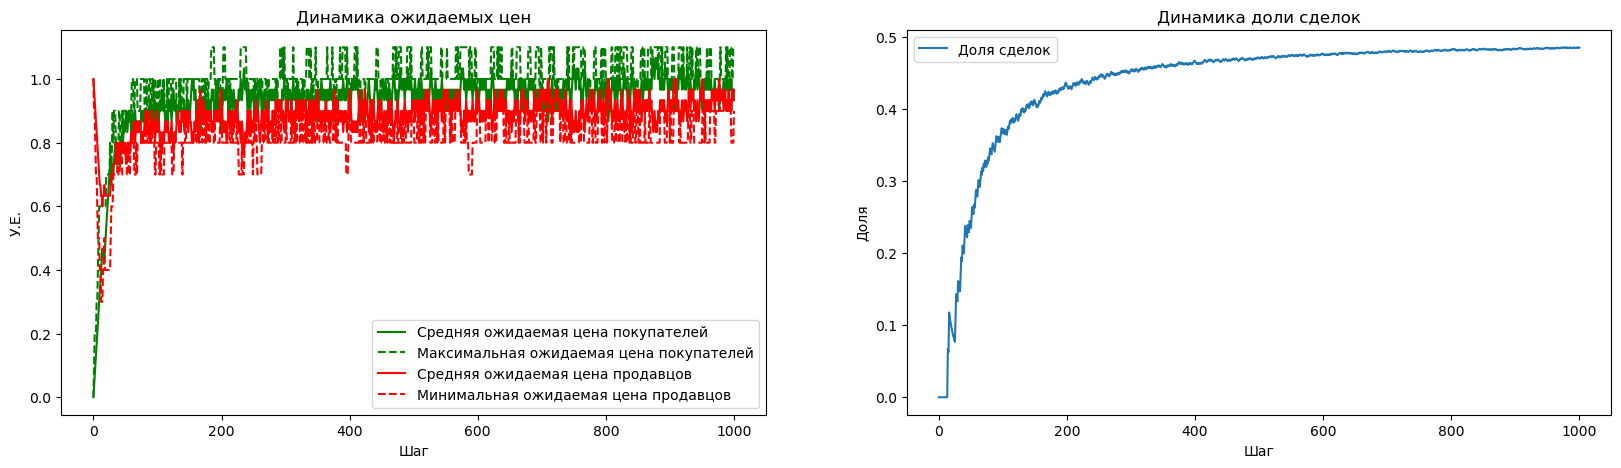

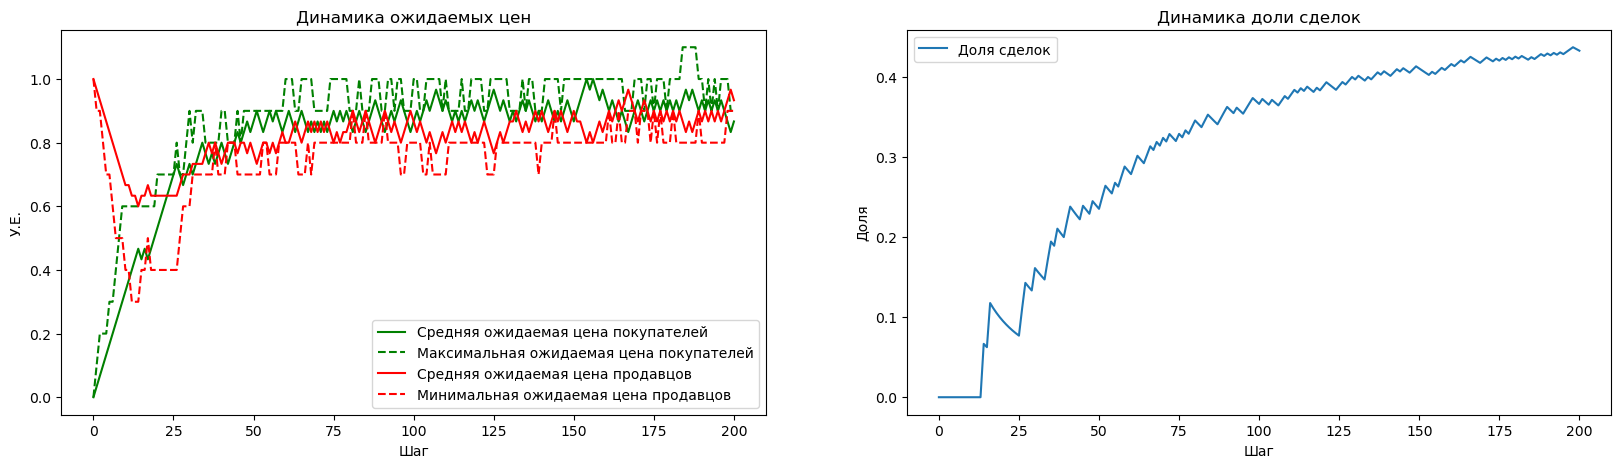

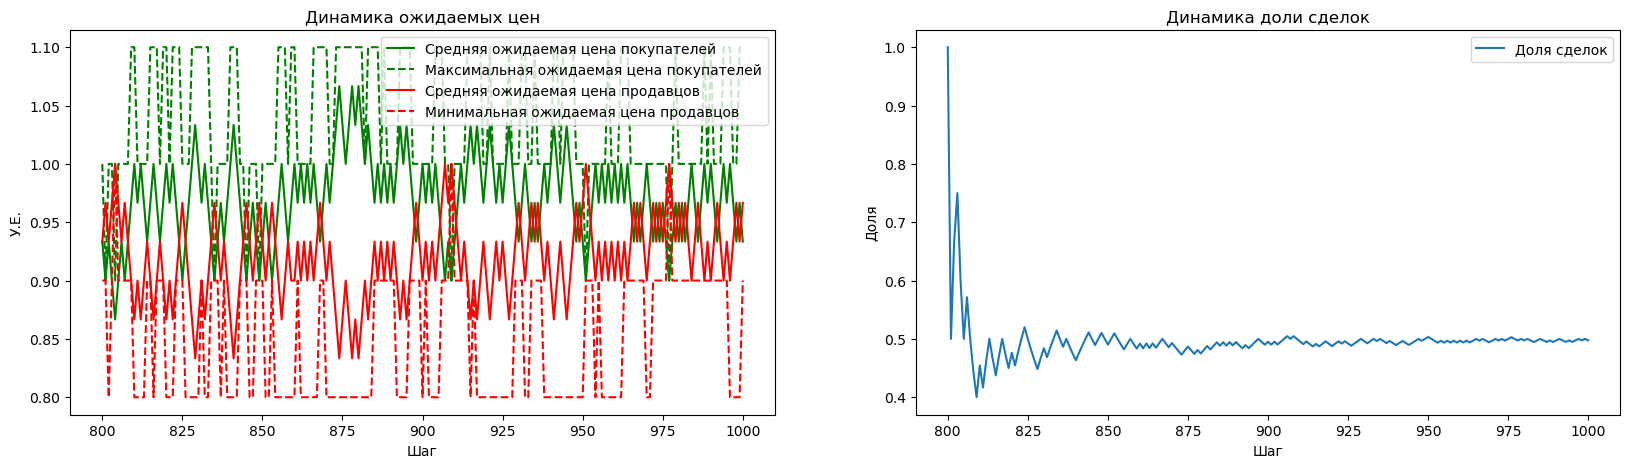

In [39]:
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

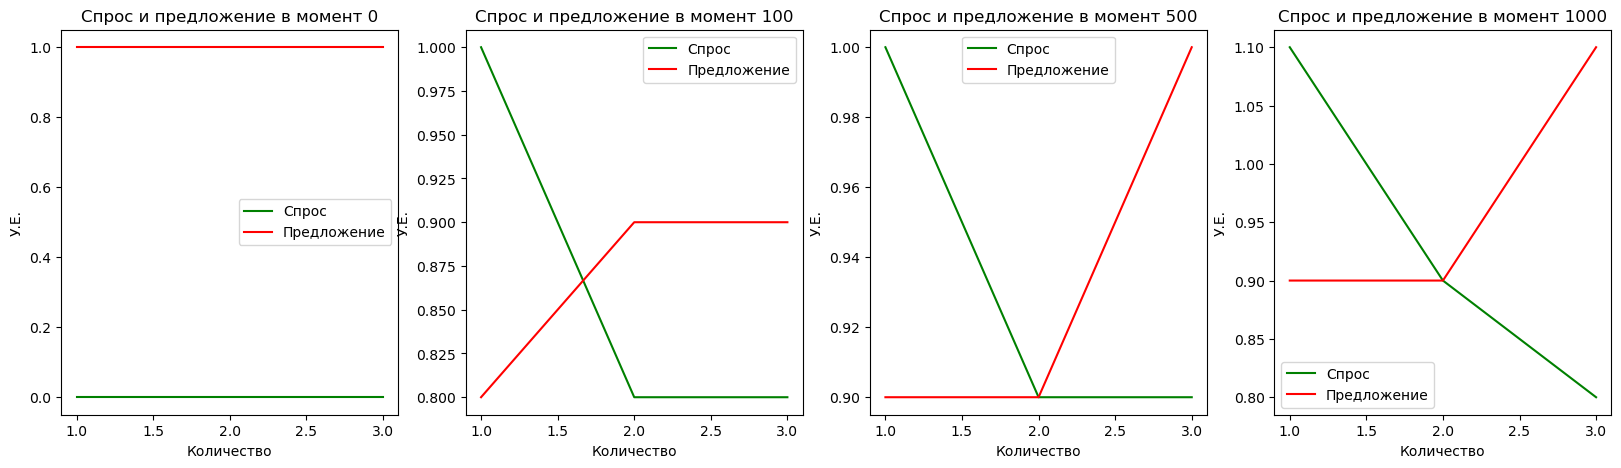

In [18]:
model.plot_supply_and_demand([0, 100, 500, 1000])

# Задания

При выполнения всех заданий Вам необходимо писать текст (в Markdown ячейках), вызывать существующие фрагменты кода и писать собственный код. При реализации кода придерживайтесь объектно-ориентированного подхода. Обращаем Ваше внимание, что в данных заданиях будет в первую очередь будет оцениваться Ваши интерпретации и выводы относительно свойств и поведения моделей.   

## Задание 1 (1 балл)

Запустите базовую модель с разными параметрами. Проанализируйте, как меняется поведение модели в зависимости от изменения параметров. Опишите эти изменения.

Проинтерпретируйте (дайте объяснение) результаты работы базовой модели. В частности, обратите внимание на следующие аспекты:
* Ожидаемые цены попадают в некоторый интервал.
* Доля сделок выходит на некоторый постоянный уровень.
* Скорости сходимости зависят от количества продавцов и покупателей и шага цены.
* Опишите характеристики изменений диаграмм связей со временем.

## Ответ: ##
Я поизменял разные параметры внутри модели и пришел к таким выводам. 
**Изменение параметров и их влияние на модель:**

1. **Количество продавцов и покупателей (n, m):** 
    При увеличении количества продавцов и покупателей, скорость сходимости ожидаемых цен увеличивается, т.к. большее количество агентов участвует в процессе согласования цен. Доля сделок также возрастает, т.к. большее количество покупателей и продавцов повышает шансы найти друг друга.
2. **Интервал для определения минимальной цены продавца (saller_min, saller_max):**
    Увеличение интервала (saller_max - saller_min) приводит к увеличению диапазона, в котором формируются ожидаемые цены продавцов. Это может замедлить сходимость, т.к. продавцы с разными начальными ценами будут стремиться к разным точкам равновесия.
3. **Интервал для определения максимальной цены покупателя (consumer_min, consumer_max):**
    Аналогично с интервалом продавцов, увеличение интервала покупателей (consumer_max - consumer_min) может замедлить сходимость, так как покупатели с разными максимальными ценами будут стремиться к разным точкам равновесия.
4. **Шаг изменения ожидаемой цены (saller_delta, consumer_delta):**
    Увеличение шага приводит к более грубым изменениям ожидаемых цен и, следовательно, к более медленной сходимости. В то же время, большой шаг может быстрее привести к достижению точки равновесия, т.к. агенты более агрессивно корректируют свои ожидания. При очень маленьком шаге сходимость может быть очень медленной, а при очень большом шаге модель может не достичь устойчивого состояния, а "скакать" между разными значениями ожидаемых цен. 

**Интерпретация результатов работы базовой модели:**

1. **Ожидаемые цены попадают в некоторый интервал:** Ожидаемые цены продавцов и покупателей с течением времени сходятся к определенному диапазону, который определяется параметрами модели, а именно, интервалами для минимальной цены продавца и максимальной цены покупателя. 
2. **Доля сделок выходит на некоторый постоянный уровень:** По мере схождения ожидаемых цен, доля сделок стабилизируется на определенном уровне, который зависит от перекрытия интервалов ожидаемых цен продавцов и покупателей. Если интервалы сильно перекрываются, доля сделок будет выше, а если интервалы почти не пересекаются, доля сделок будет ниже.
3. **Скорости сходимости зависят от количества продавцов и покупателей и шага цены:** Как уже было упомянуто выше, большее количество агентов и меньший шаг цены ведут к более быстрой сходимости.
4. **Изменения диаграмм связей со временем:** На начальных этапах моделирования, график связей будет хаотичным, т.к. ожидаемые цены агентов меняются случайным образом. По мере схождения ожидаемых цен, количество неудачных сделок (красные линии) уменьшается, а количество успешных сделок (зеленые линии) увеличивается. В конце концов, график связей будет отражать устойчивое состояние, где агенты совершают сделки с высокой вероятностью, если их ожидаемые цены находятся в зоне перекрытия.
 

## Задание 2 (2 балла)


Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Разные вероятности выбора разных продавцов и покупателей.
2. Генерация разных групп покупателей и продавцов.
3. Разные переговорные позиции продавцов и покупателей (в том числе случайные).
4. Ожидания покупателей и продавцов меняются только в сторону средней цены предыдущего периода.
5. К граничным ценам продавцов и покупателей каждый период добавляется случайная величина.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [40]:
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random() * (consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self, avg_price):
        """
        Покупатель увеличивает ожидаемую цену,
        только если она ниже средней цены предыдущего периода.
        """
        if self.expect_price < avg_price:
            self.expect_price += self.delta

    def decrease_expect_price(self, avg_price):
        """
        Покупатель уменьшает ожидаемую цену,
        только если она выше средней цены предыдущего периода.
        """
        if self.expect_price > avg_price:
            self.expect_price -= self.delta

class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random() * (seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self, avg_price):
        """
        Продавец увеличивает ожидаемую цену,
        только если она ниже средней цены предыдущего периода.
        """
        if self.expect_price < avg_price:
            self.expect_price += self.delta

    def decrease_expect_price(self, avg_price):
        """
        Продавец уменьшает ожидаемую цену,
        только если она выше средней цены предыдущего периода.
        """
        if self.expect_price > avg_price:
            self.expect_price -= self.delta
            

class Model_2:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        # Расчет средней цены предыдущего периода
        if len(self.sellers_expect_price) > 1:
            avg_price = (mean(self.sellers_expect_price[-1]) + mean(self.consumers_expect_price[-1])) / 2
        else:
            avg_price = (self.sellers[seller_id].expect_price + self.consumers[consumer_id].expect_price) / 2

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель корректирует expect_price
            self.consumers[consumer_id].decrease_expect_price(avg_price)

            # Данный продавец корректирует expect_price
            self.sellers[seller_id].increase_expect_price(avg_price)

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель корректирует expect_price
            self.sellers[seller_id].decrease_expect_price(avg_price)

            # Данный продавец корректирует expect_price
            self.consumers[consumer_id].increase_expect_price(avg_price)


    def run(self, num_of_steps):
        '''
            Запуск num_of_steps шагов модели
        '''
        for _ in trange(num_of_steps+1): # trange вместо range для визуализации прогресс-бара

            # Выбираем индекс покупателя случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)

            # Выбираем индекс продавца случайным образом
            seller_id = random.randrange(0, self.num_of_sellers)

            # Моделируем сделку
            self.deal(consumer_id, seller_id)


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph

## Визуализация модели

100%|██████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 200721.82it/s]


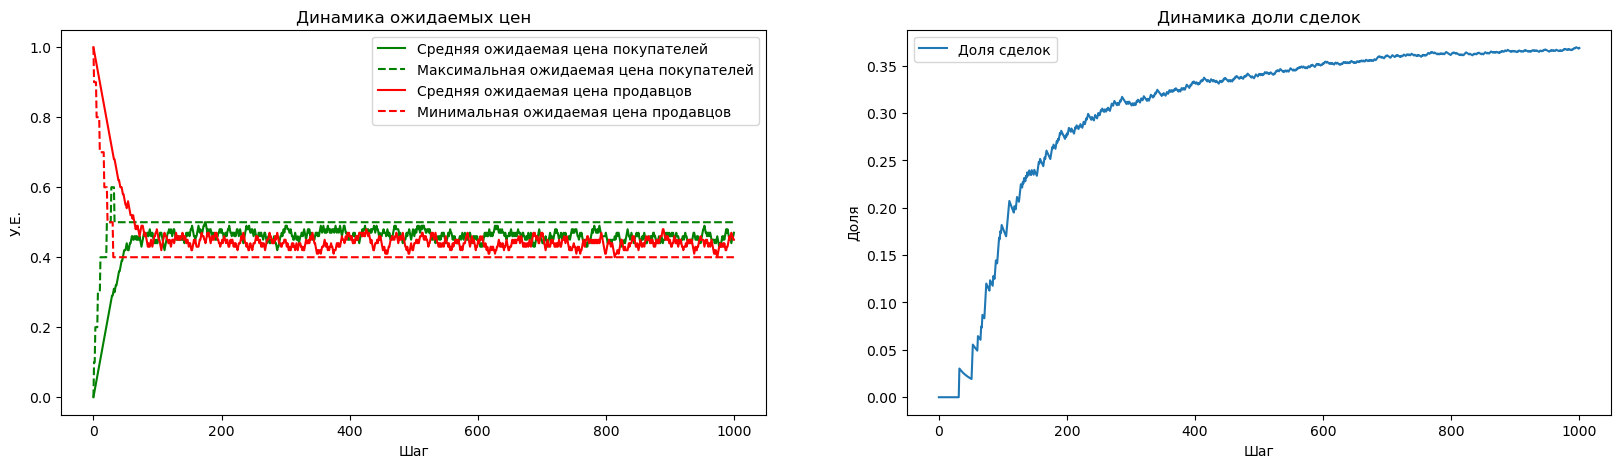

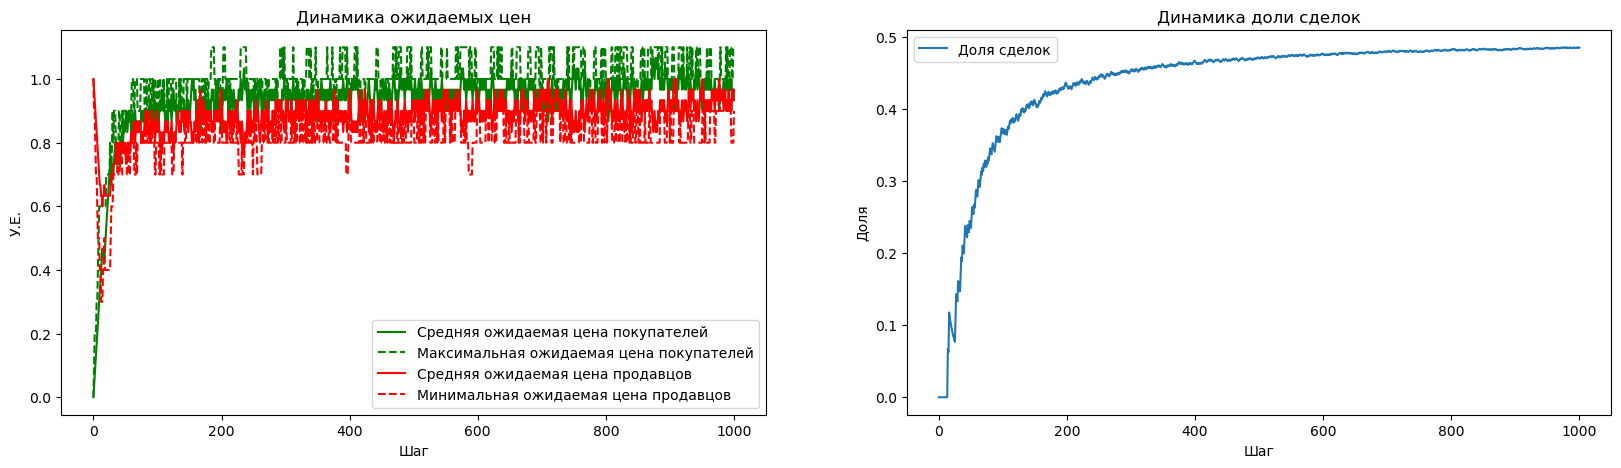

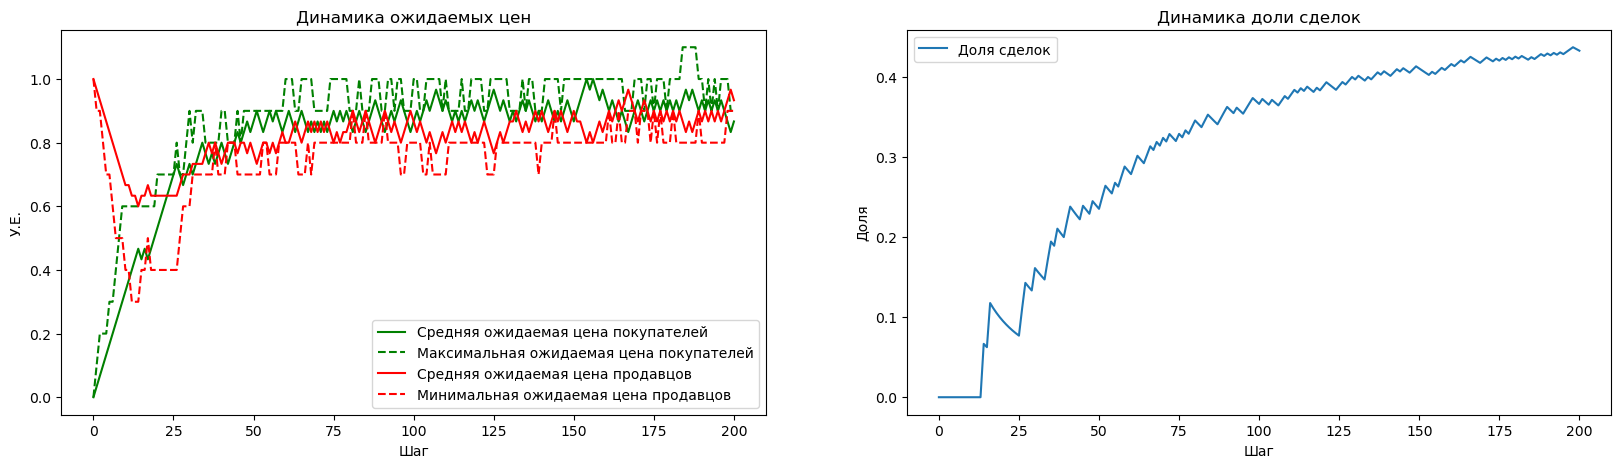

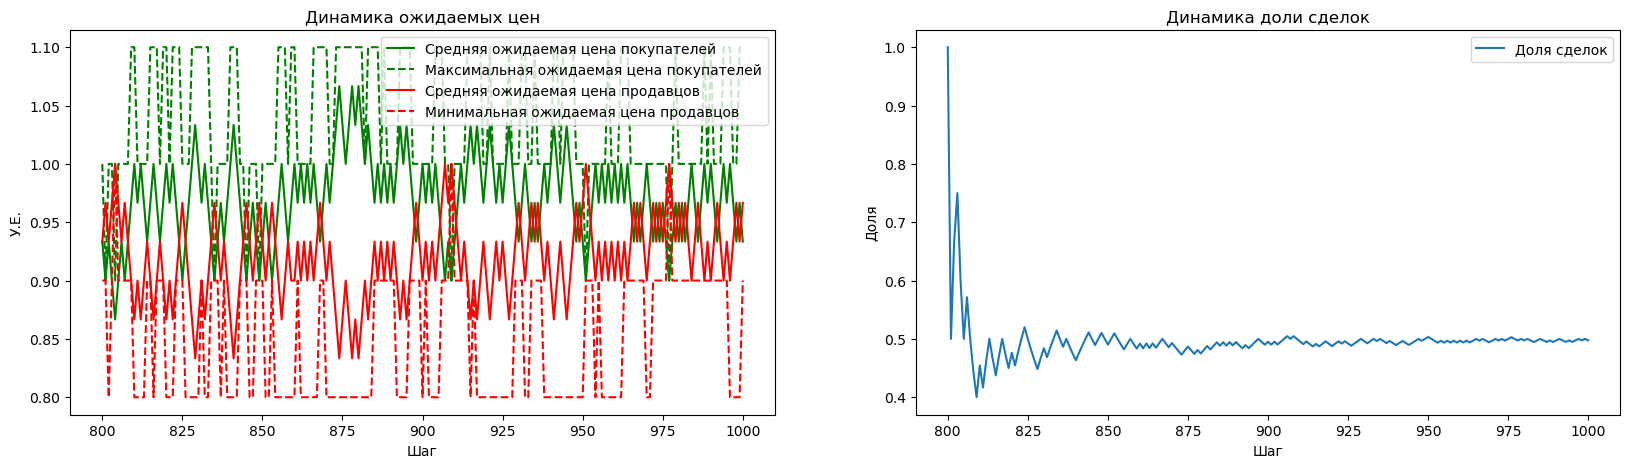

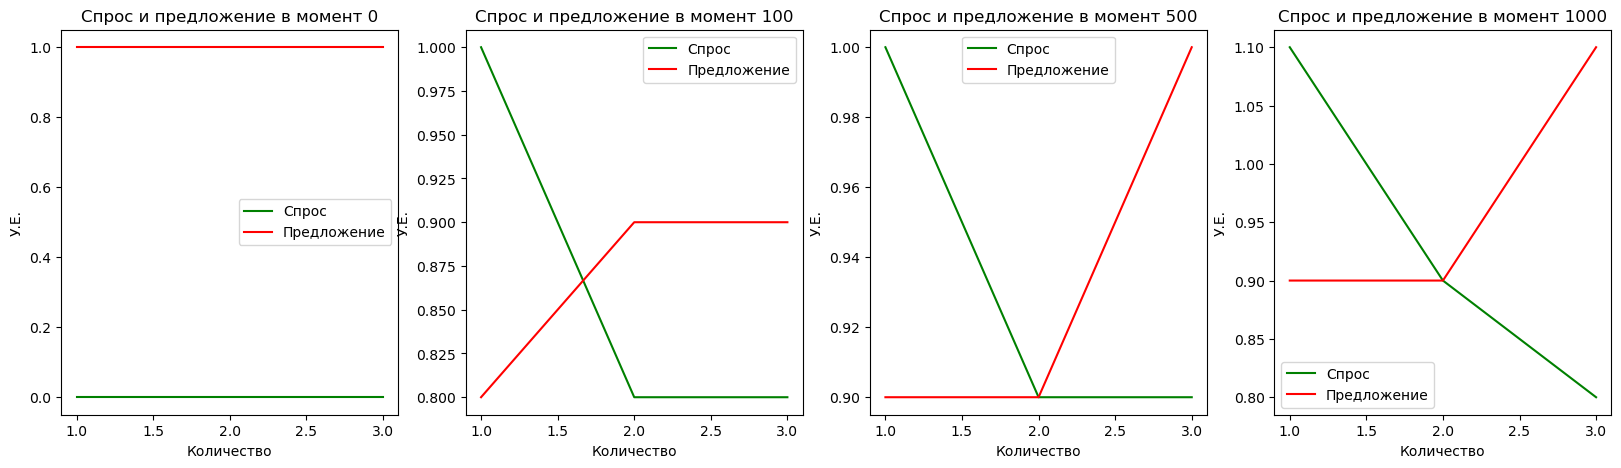

In [41]:
#Запускаем модель
random.seed(42)
modified_model = Model_2(num_of_consumers=10,
              num_of_sellers=10,
              consumer_min=3,
              consumer_max=4,
              consumer_delta=0.1,
              seller_min=0,
              seller_max=1,
              seller_delta=0.1)
modified_model.run(1000)
modified_model.plot_dynamics(0, 1000)

#Визуализация
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

#model.plot_graph(100, 200) У пытался, но не смог решить проблему по устанвке graphviz

model.plot_supply_and_demand([0, 100, 500, 1000])

**Описание работы модифицированной модели:**
В измененной модели агенты (и покупатели, и продавцы) при принятии решения об изменении своей ожидаемой цены учитывают среднюю цену предыдущего периода. Если ожидаемая цена агента ниже средней цены предыдущего периода, он будет склонен ее увеличить, но не выше средней цены. Если ожидаемая цена агента выше средней цены предыдущего периода, он будет склонен ее уменьшить, но не ниже средней цены. 

**Проинтерпретация результатов:**
1. В отличие от базовой модели, где колебания цен могут быть более хаотичными, в модифицированной модели наблюдается более плавное движение цен к точке равновесия.
2. Модифицированная модель менее чувствительна к выбросам, так как агенты ориентируются на среднюю цену, а не на отдельные высокие или низкие значения.
3. В модифицированной модели начальные ожидания играют более важную роль, так как задают направление движения цен.

## Задание 3 (3 балла)

Предположим, что теперь мы рассматриваем последовательные дни, и контакты продавцов и покупателей происходят в течение дня. Количество контактов между продавцами и покупателями в день ограничено константой max_connections, и не меняется в процессе моделирования.

Выделим локальные (внутридневные) параметры, которые меняются и учитываются в течение одного дня. Но на следующий день сбрасываются до исходных значений.

Модифицируйте базовую модель одним из указанных ниже вариантов.

<b><font color="red">!</font> Номер Вашего варианта указан в <a href="https://docs.google.com/spreadsheets/d/1jWBLQ1bJG2t2Ci38r1xFrKP06VjFn-IyKQO4PIEvXTA/edit#gid=0">таблице</a>.</b>

1. Локальные параметры: количество сделок агента. Не может быть более одной сделки.
2. Локальные параметры: у каждого продавца свое фиксированное количество товара, которое он может продать в один день. В конце для излишки сгорают.
3. Локальные параметры: у каждого покупателя свое фиксированное количество товара, которое он может купить в один день.
4. Локальные параметры: у каждого продавца случайное количество товара, которое он может продать в один день. В конце для излишки сгорают.
5. Локальные параметры: у каждого покупателя случайное количество товара, которое он может купить в один день.

* Продемонстрируйте и опишите работу модифицированной модели.
* Проинтерпретируйте результаты работы модели.

In [42]:
class Model_3:
    def __init__(self, num_of_consumers, num_of_sellers, consumer_min, consumer_max, consumer_delta, seller_min, seller_max, seller_delta, max_connections):
        '''
            Конструктор класса.

            num_of_consumers -- количество покупателей
            num_of_sellers -- количество продавцов
            consumer_min -- минимальное возможное значение max_price для покупателей
            consumer_max -- максимально возможное значение max_price для покупателей
            consumer_delta -- шаг изменения expect_price для покупателей
            seller_min -- минимальное возможное значение min_price для продавцов
            seller_max -- максимально возможное значение min_price для продавцов
            seller_delta -- шаг изменения expect_price для продавцов
            max_connections -- максимальное количество контактов (попыток сделок) в день

        '''
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers

        # Список всех продавцов модели
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta) for _ in range(num_of_consumers)]

        # Список всех покупателей модели
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]

        # Список списков. На позиции i находится список текущих значений expect_price для всех покупателей на шаге i.
        self.consumers_expect_price = []

        # Список списков. На позиции i находится список текущих значений expect_price для всех продавцов на шаге i.
        self.sellers_expect_price = []

        # Список результатов сделок. На позиции i находится словарь вида
        # {
        #     'consumer_id' : consumer_id,
        #     'seller_id' : seller_id
        #     'result' : result
        # }
        # где result = 1, если на i шаге была успешная сделка, иначе 0.
        self.deals_results = []
        
        self.max_connections = max_connections

    def day_run(self):
        """Моделирование одного дня."""
        # Сброс количества сделок для всех агентов в начале дня
        for consumer in self.consumers:
            consumer.reset_deals()
        for seller in self.sellers:
            seller.reset_deals()

        for _ in range(self.max_connections):
            # Выбираем индекс покупателя и продавца случайным образом
            consumer_id = random.randrange(0, self.num_of_consumers)
            seller_id = random.randrange(0, self.num_of_sellers)

            # Проверяем, могут ли эти агенты совершить сделку
            if self.consumers[consumer_id].deals_today == 0 and self.sellers[seller_id].deals_today == 0:
                self.deal(consumer_id, seller_id)


    def deal(self, consumer_id, seller_id):
        '''
            Моделирование сделки между покупателем с индексом consumer_id и продавцом с индексом seller_id

            consumer_id -- индекс покупателя в массиве self.consumers
            seller_id -- индекс продавца в массиве self.sellers
        '''

        # Сохраняем текущие значения expect_price покупателей
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])

        # Сохраняем текущие значения expect_price продавцов
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Сделка состоялась

            # Записываем факт состоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 1
                })

            # Данный покупатель решает уменьшить у себя expect_price
            self.consumers[consumer_id].decrease_expect_price()

            # Данный продавец решает увеличить у себя expect_price
            self.sellers[seller_id].increase_expect_price()

        else:
            # Сделка не состоялась

            # Записываем факт несостоявшейся сделки
            self.deals_results.append({
                'consumer_id' : consumer_id,
                'seller_id' : seller_id,
                'result' : 0
                })

            # Данный покупатель решает увеличить у себя expect_price
            self.sellers[seller_id].decrease_expect_price()

            # Данный продавец решает уменьшить у себя expect_price
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_days):
        """
        Запуск модели на num_of_days дней.
        """
        for _ in trange(num_of_days + 1):
            # Моделируем один день
            self.day_run() 

            # Сохраняем значения expected_price для всех агентов в конце дня
            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])


    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph


class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta):
        self.max_price = consumer_min + random.random()*(consumer_max - consumer_min)
        self.expect_price = 0
        self.delta = consumer_delta

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta
    
    def reset_deals(self):
        """Сбрасывает количество сделок для нового дня."""
        self.deals_today = 0 


class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random()*(seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta
            
    def reset_deals(self):
        """Сбрасывает количество сделок для нового дня."""
        self.deals_today = 0


100%|████████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 6437.95it/s]


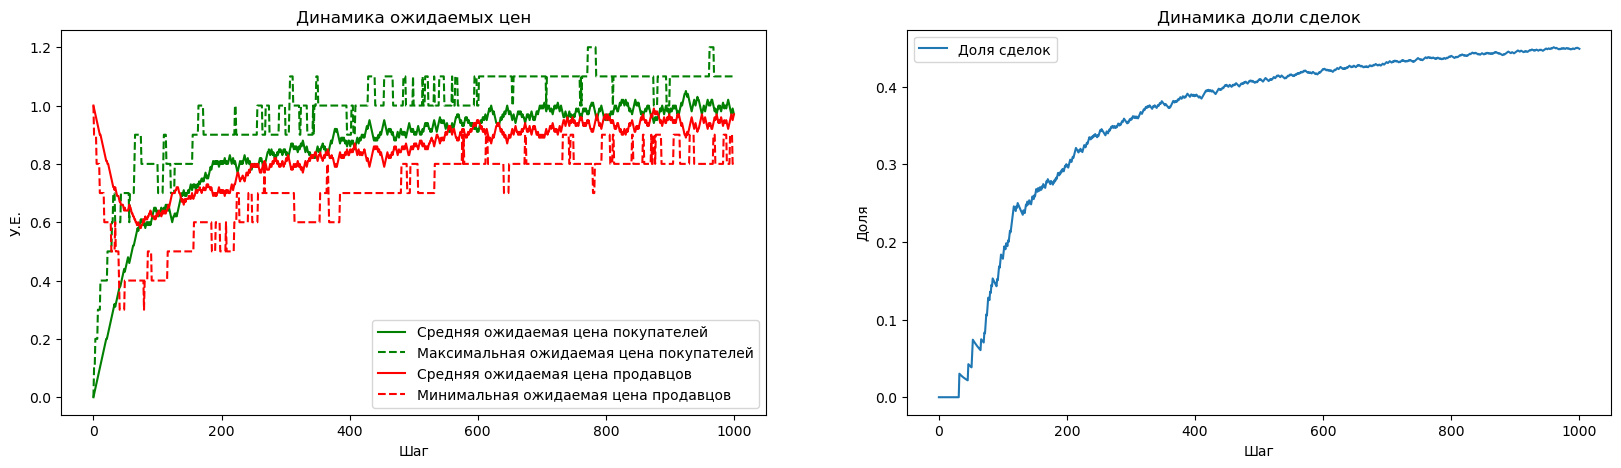

In [43]:
random.seed(42)
modified_model = Model_3(num_of_consumers=10,
                          num_of_sellers=10,
                          consumer_min=3,
                          consumer_max=4,
                          consumer_delta=0.1,
                          seller_min=0,
                          seller_max=1,
                          seller_delta=0.1,
                          max_connections=20)  # Устанавливаем максимальное количество контактов в день
modified_model.run(1000)  # Запускаем на 1000 дней
modified_model.plot_dynamics(0, 1000)

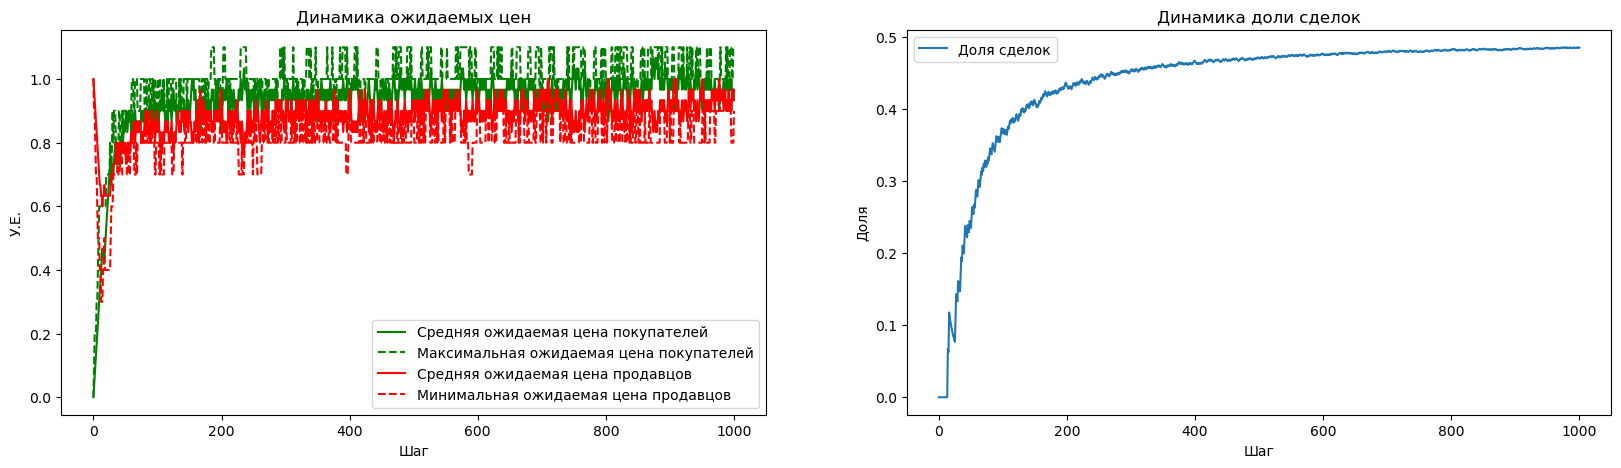

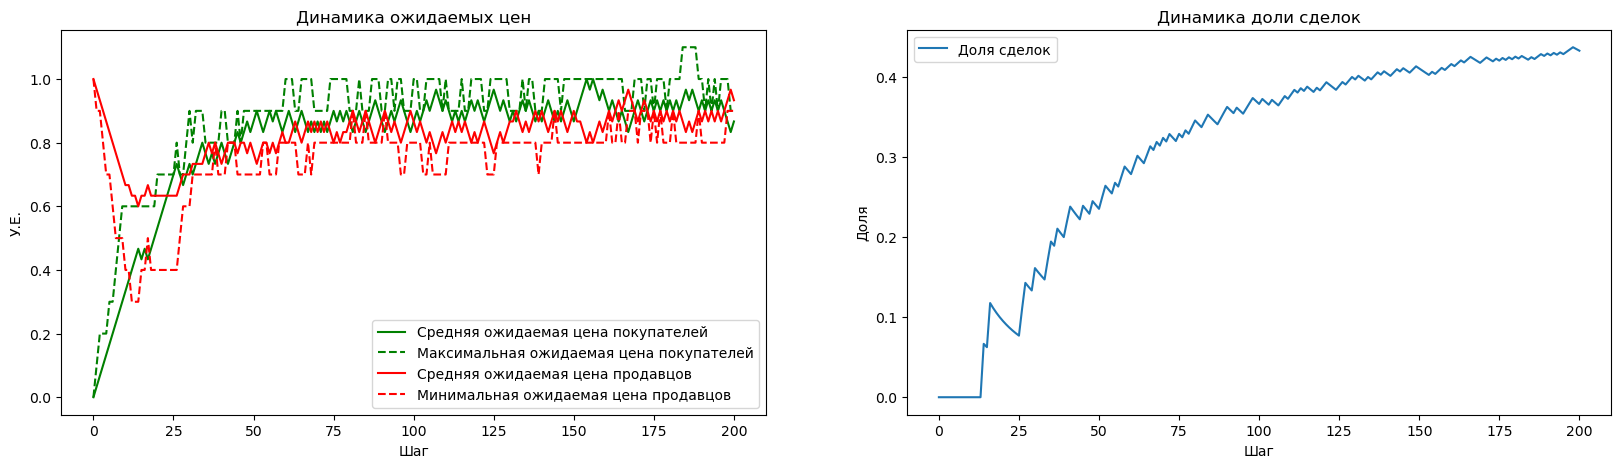

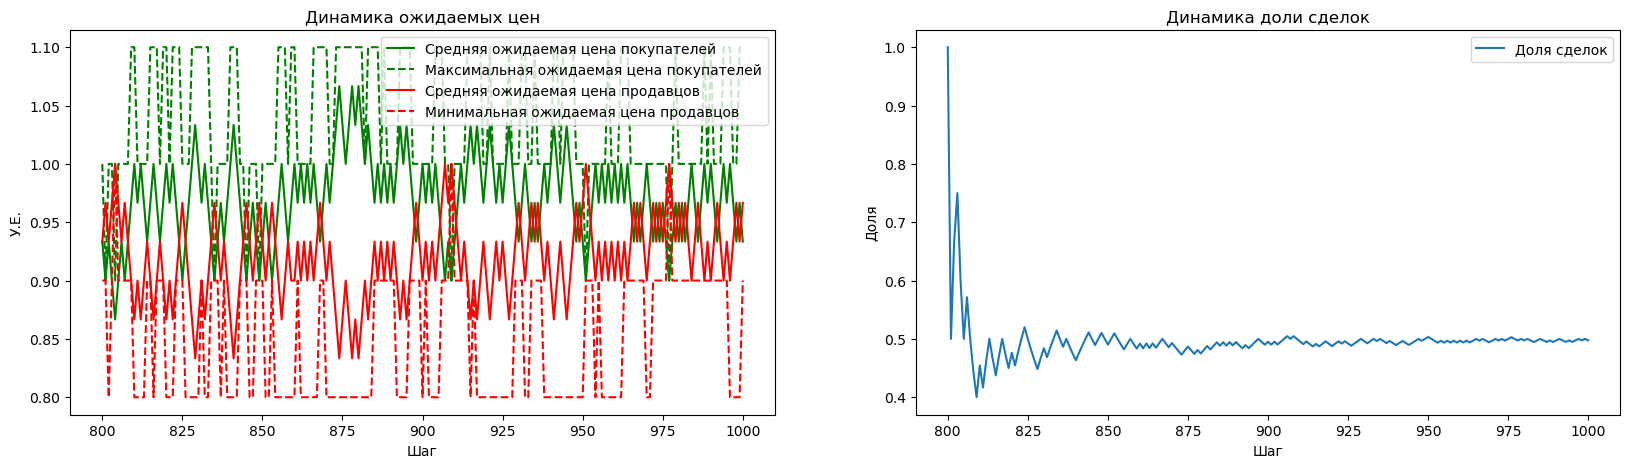

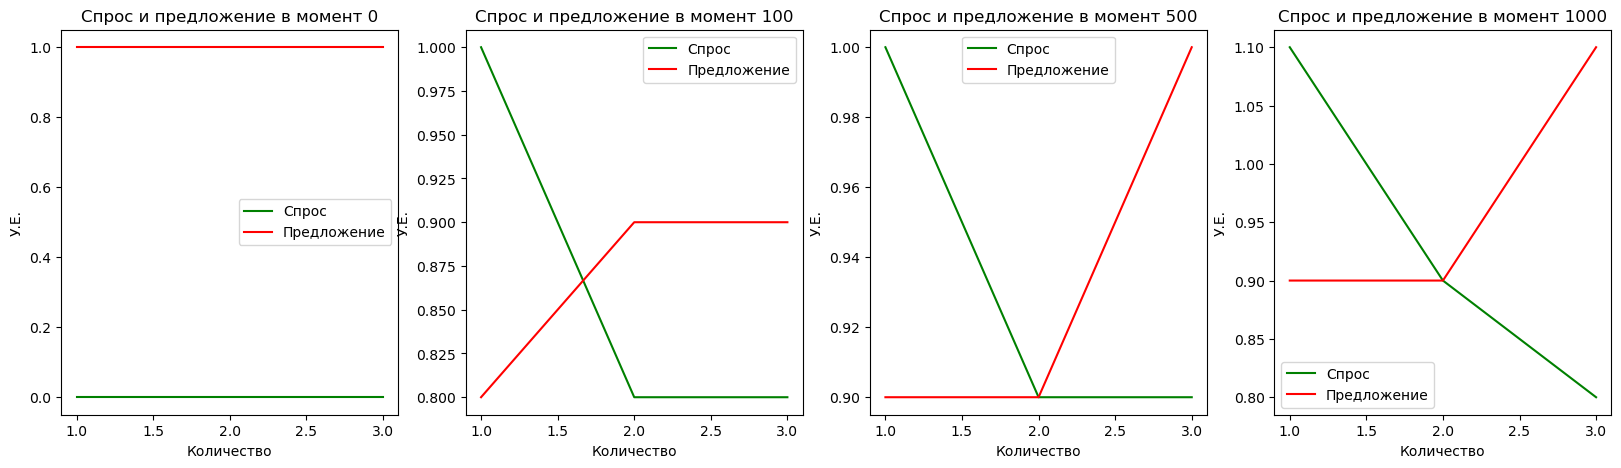

In [44]:
#Визуализация
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)

#model.plot_graph(100, 200) У пытался, но не смог решить проблему по устанвке graphviz

model.plot_supply_and_demand([0, 100, 500, 1000])

## Модифицированная модель с ограничением на одну сделку в день: описание работы

Каждый агент может совершить не более одной сделки в день:

**1. Инициализация:**
    Задаются параметры:
       `num_of_consumers`: количество покупателей
       `num_of_sellers`: количество продавцов
       Интервалы для их минимальных и максимальных цен 
       `consumer_delta`, `seller_delta`: шаг изменения ожидаемой цены 
       `max_connections`: максимальное количество попыток сделки в день. 

**2. Начало дня:**
       В функции `day_run` у всех агентов обнуляется количество совершенных сделок (`deals_today`). 

**3. Цикл контактов:**
    В течение дня происходит `max_connections` попыток заключения сделки.  
    На каждой итерации случайно выбирается один покупатель и один продавец.
   **Проверка возможности сделки:**  
       **Условие:**  и у покупателя, и у продавца `deals_today == 0` (еще не совершали сделок сегодня). 
    **Моделирование сделки (если возможно):** 
       Вызывается функция `deal(consumer_id, seller_id)`:
          Сравниваются ожидаемые цены продавца и покупателя.
          **Сделка совершается, если цена продавца меньше или равна цене покупателя:**
             Ожидаемая цена продавца увеличивается.
             Ожидаемая цена покупателя уменьшается.
             `deals_today`  у обоих агентов становится равным 1.
          **Сделка не совершается, если цена продавца выше цены покупателя:**
             Ожидаемая цена продавца немного уменьшается.
             Ожидаемая цена покупателя немного увеличивается.
             
**4. Конец дня:**
    После `max_connections` попыток моделирования сделок день заканчивается.
    Сохраняются значения `expect_price` всех агентов.
    Цикл повторяется для следующего дня (шаг 2).


## Результаты
После сравнения базовой модели и модели 3 можно сделать несколько выводов:

1. Ограничение приводит к уменьшению общего количества сделок в модели. Не все выгодные сделки будут реализованы, так как агенты ограничены одной сделкой в день.
2. Ожидаемые цены меняются более плавно, чем в базовой модели, где колебания цен могут быть более резкими и хаотичными.
3. В модифицированной модели сходимость цен к равновесию происходит медленнее, чем в базовой. В некоторых случаях равновесие может быть достигнуто за большее количество шагов, а в некоторых – не достигнуто вовсе.
4. Влияние начальных условий и max_connections: начальные ожидания агентов играют более важную роль в модифицированной модели, так как влияют на то, какие сделки будут заключаться в первые дни. А параметр max_connections становится важным регулятором скорости сходимости.


## Задание 4 (4 балла)


Придумайте свою модификацию модели, в которой отражены другие черты реальных рынков.

<b><font color="red">!</font> Перед выполнением задания необходимо <a href="https://docs.google.com/forms/d/e/1FAIpQLSfOd3rBSQUAnE7VdCi_Yepvz5O3ZZhX8Zi2T5eYb7kFWw6ggg/viewform">согласовать</a> Вашу идею с преподавателем. Ваше предложение не должно совпадать с предыдущими модификациями или модификациями других студентов.
Все согласованные предложения от студентов будут отображаться в <a href="https://docs.google.com/spreadsheets/d/1Qu_Sr7ZSrm8tLLf33jEa06q7c9dS1EAUet9OlpnsY8U/edit?resourcekey#gid=1568177539">таблице</a>.</b>

* Продемонстрируйте и опишите работу модифицированной модели.
* По возможности сделайте ее визуализацию.
* Проинтерпретируйте результаты работы модели.

## Описание модели
Моя модель содержит в себе два больших изменения базовой модели:

1. **Комиссия продавцам** Пусть все сделки проходят на каком-то сайте, который взимает комиссию с продавцов за каждую проданную ими единицу товара, из-за чего каждый продавец решает: платить комиссию самому и продавать по той же цене (и тем же спросом), или же добавлять комиссию к цене товара и заставлять платить покупателей (что повлияет на способность покупателя купить товар).

2. **Финансовый портфель** Пусть у покупателей вместо предполагаемой цены будет свой портфель акций каких-то k фирм (всего L акций каждой фирмы, котировки акций меняются рандомно изо дня в день), и их покупательная способность формируется из повышений или понижений дохода с акций (если доход растет, то они могут купить товар по бОльшей цене, иначе по более низкой).

In [45]:
class Consumer:
    def __init__(self, consumer_min, consumer_max, consumer_delta, k, initial_stock_price):
        self.max_price = consumer_min + random.random() * (consumer_max - consumer_min)
        self.expect_price = self.max_price  # Начальная ожидаемая цена
        self.delta = consumer_delta
        self.portfolio = [random.randint(1, 10) for _ in range(k)]  # Портфель акций
        self.initial_stock_price = initial_stock_price[:]
        self.deals_today = 0

    def increase_expect_price(self):
        if self.expect_price + self.delta <= self.max_price:
            self.expect_price += self.delta

    def decrease_expect_price(self):
        self.expect_price -= self.delta

    def update_expect_price(self, market_change):
        """Изменяет ожидаемую цену в зависимости от рынка акций."""
        self.expect_price *= market_change
        # Ограничение ожидаемой цены:
        self.expect_price = max(self.expect_price, 0)
        self.expect_price = min(self.expect_price, self.max_price)

    def reset_deals(self):
        """Сбрасывает количество сделок для нового дня."""
        self.deals_today = 0 

class Seller:
    def __init__(self, seller_min, seller_max, seller_delta):
        self.min_price = seller_min + random.random() * (seller_max - seller_min)
        self.expect_price = seller_max
        self.delta = seller_delta
        self.deals_today = 0

    def increase_expect_price(self):
        self.expect_price += self.delta

    def decrease_expect_price(self):
        if self.expect_price - self.delta >= self.min_price:
            self.expect_price -= self.delta

    def reset_deals(self):
        """Сбрасывает количество сделок для нового дня."""
        self.deals_today = 0

class Model_4:
    def __init__(self, 
                 num_of_consumers, 
                 num_of_sellers, 
                 consumer_min, 
                 consumer_max, 
                 consumer_delta, 
                 seller_min, 
                 seller_max, 
                 seller_delta, 
                 max_connections, 
                 commission,
                 k,
                 initial_stock_price):
        
        self.num_of_consumers = num_of_consumers
        self.num_of_sellers = num_of_sellers
        self.consumers = [Consumer(consumer_min, consumer_max, consumer_delta, k, initial_stock_price) for _ in range(num_of_consumers)]
        self.sellers = [Seller(seller_min, seller_max, seller_delta) for _ in range(num_of_sellers)]
        self.consumers_expect_price = []
        self.sellers_expect_price = []
        self.deals_results = []
        self.max_connections = max_connections
        self.commission = commission
        self.k = k
        self.stock_prices = [initial_stock_price[:] for _ in range(num_of_consumers)] # история цен акций

    def day_run(self):
        for consumer in self.consumers:
            consumer.reset_deals()
        for seller in self.sellers:
            seller.reset_deals()

        # Изменение цен акций и обновление ожидаемой цены покупателей
        self.update_stock_prices()

        for _ in range(self.max_connections):
            consumer_id = random.randrange(0, self.num_of_consumers)
            seller_id = random.randrange(0, self.num_of_sellers)

            if self.consumers[consumer_id].deals_today == 0 and self.sellers[seller_id].deals_today == 0:
                self.deal(consumer_id, seller_id)

    def update_stock_prices(self):
        """Обновляет цены акций и ожидания покупателей."""
        for i in range(self.num_of_consumers):
            market_change = random.uniform(0.95, 1.05)  # Случайное изменение цены акций
            for j in range(self.k):
                self.stock_prices[i][j] *= market_change 
            self.consumers[i].update_expect_price(market_change)

    def deal(self, consumer_id, seller_id):
        self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
        self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

        if self.sellers[seller_id].expect_price <= self.consumers[consumer_id].expect_price:
            # Продавец решает, платить комиссию или переложить на покупателя
            if random.random() < 0.5:  # 50/50
                seller_gets = self.sellers[seller_id].expect_price * (1 - self.commission)
                if seller_gets >= self.sellers[seller_id].min_price:
                    # Сделка состоялась, продавец платит комиссию
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id,
                        'result': 1
                    })
                    self.consumers[consumer_id].decrease_expect_price()
                    self.sellers[seller_id].increase_expect_price()
                    self.consumers[consumer_id].deals_today = 1
                    self.sellers[seller_id].deals_today = 1
            else:
                total_price = self.sellers[seller_id].expect_price / (1 - self.commission)
                if total_price <= self.consumers[consumer_id].expect_price:
                    # Сделка состоялась, покупатель платит комиссию
                    self.deals_results.append({
                        'consumer_id': consumer_id,
                        'seller_id': seller_id,
                        'result': 1
                    })
                    self.consumers[consumer_id].decrease_expect_price()
                    self.sellers[seller_id].increase_expect_price()
                    self.consumers[consumer_id].deals_today = 1
                    self.sellers[seller_id].deals_today = 1
        else:
            # Сделка не состоялась
            self.deals_results.append({
                'consumer_id': consumer_id,
                'seller_id': seller_id,
                'result': 0
            })
            self.sellers[seller_id].decrease_expect_price()
            self.consumers[consumer_id].increase_expect_price()


    def run(self, num_of_days):
        """Запуск модели на num_of_days дней."""
        for _ in trange(num_of_days + 1):
            self.day_run()
            self.consumers_expect_price.append([consumer.expect_price for consumer in self.consumers])
            self.sellers_expect_price.append([seller.expect_price for seller in self.sellers])

    def plot_dynamics(self, start, end):
        '''
            Визуализация динамики модели на шагах от start до end включительно
        '''

        # Формируем два графика по горизонтали
        fig = plt.figure(figsize = (20,5))
        ax1 = fig.add_subplot(1,2,1)
        ax2 = fig.add_subplot(1,2,2)

        # Список точек по оси шагов
        steps_range = list(range(start, end+1))
        ax1.title.set_text("Динамика ожидаемых цен")

        # Среднее значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(mean, self.consumers_expect_price[start : end+1])), color='g', label = "Средняя ожидаемая цена покупателей")

        # Максимальное значение expect_price среди покупателей
        ax1.plot(steps_range, list(map(max, self.consumers_expect_price[start : end+1])), color='g', linestyle='--', label = "Максимальная ожидаемая цена покупателей")

        # Среднее значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(mean, self.sellers_expect_price[start : end+1])), color='r', label = "Средняя ожидаемая цена продавцов")

        # Минимальное значение expect_price среди продавцов
        ax1.plot(steps_range, list(map(min, self.sellers_expect_price[start : end+1])), color='r', linestyle='--', label = "Минимальная ожидаемая цена продавцов")
        ax1.legend()
        ax1.set_xlabel("Шаг")
        ax1.set_ylabel("У.Е.")


        # Находим долю успешных сделок на отрезке от start до end включительно
        deals_sum = [0]
        for i in range(start, end+1):
            deals_sum.append(deals_sum[-1] + self.deals_results[i]['result'])
        deals_fraction = [deals_sum[i] / i for i in range(1, end - start + 2)]
        ax2.title.set_text("Динамика доли сделок")
        ax2.plot(steps_range, deals_fraction, label="Доля сделок")
        ax2.legend()
        ax2.set_xlabel("Шаг")
        ax2.set_ylabel("Доля")

    def plot_supply_and_demand(self, pos_list):
        '''
            Визуализация спроса и предложения в моменты времени, указанные в списке pos_list
        '''

        # Формируем фигуру, состоящую из len(pos) графиков, расположенных горизонтально
        fig, axs = plt.subplots(1, len(pos_list), figsize = (5 * len(pos_list), 5))


        for i in range(len(pos_list)):
            # Для каждого значения из pos рисуем свой график
            axs[i].title.set_text(f"Спрос и предложение в момент {pos_list[i]}")

            # Все значения expect_price для покупателей в момент времени pos[i] сортируем по убыванию.
            # Этот график описывает функцию спроса, т.е. при заданном значении цены мы видим, какое количество покупателей готовы купить товар за данную цену или дороже
            axs[i].plot(list(range(1, self.num_of_consumers+1)), sorted(self.consumers_expect_price[pos_list[i]], reverse=True), color='g', label="Спрос")

            # Все значения expect_price для продавцов в момент времени pos[i] сортируем по возрастанию.
            # Этот график описывает функцию предложения, т.е. при заданном значении цены мы видим, какое количество продавцов готовы продать товар за данную цену или дешевле
            axs[i].plot(list(range(1, self.num_of_sellers+1)), sorted(self.sellers_expect_price[pos_list[i]]), color='r', label="Предложение")

            axs[i].legend()
            axs[i].set_xlabel("Количество")
            axs[i].set_ylabel("У.Е.")

    def plot_graph(self, start, end):
        '''
            Построение и визуализация графа удачных и неудачных сделок
            на отрезке времени от start до end.
        '''
        # Словарь для построения графа сделок.
        # Ключ -- пара (consumer_id, seller_id)
        # Значение -- словарь с ключами 'positive_count' и 'negative_count',
        # в которых будут подсчитано количество удачных и неудачных сделок
        # между consumer_id и seller_id в интервале от start до end
        g_deals = {}

        # Создание всех ключей в g_deals и инициирование нулевыми значениями
        for consumer_id in range(self.num_of_consumers):
            for seller_id in range(self.num_of_sellers):
                g_deals[(consumer_id, seller_id)] = {
                    'positive_count' : 0,
                    'negative_count' : 0,
                }

        # Для всех моментов времени от start до end
        for i in range(start, end+1):


            if self.deals_results[i]['result'] == 0: #Если сделка неудачная
                # то увеличиваем счетчик неудачных сделок для данной пары consumer_id и seller_id
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['negative_count'] += 1
            else:
                g_deals[self.deals_results[i]['consumer_id'], self.deals_results[i]['seller_id']]['positive_count'] += 1

        max_value = 0
        for edge, value in g_deals.items():
            max_value = max(max_value, value['negative_count'], value['positive_count'])

        graph = graphviz.Graph()
        for consumer_id in range(self.num_of_consumers):
            graph.node(f"С {consumer_id}", label=str(consumer_id), style='filled', fillcolor='blue')

        for seller_id in range(self.num_of_sellers):
            graph.node(f"S {seller_id}", label=str(seller_id), style='filled', fillcolor='magenta', shape='box')

        def get_penwidth(x):
            return str(10*x // max_value)

        for edge, value in g_deals.items():
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth = get_penwidth(value['negative_count']), color="red")
            graph.edge(f"С {edge[0]}", f"S {edge[1]}", penwidth =  get_penwidth(value['positive_count']), color="green")

        graph.attr(layout="circo")
        return graph

In [46]:
random.seed(42)

num_of_consumers = 10
num_of_sellers = 10
consumer_min = 3
consumer_max = 4
consumer_delta = 0.1
seller_min = 0
seller_max = 1
seller_delta = 0.1
max_connections = 20 
commission = 0.05  # Комиссия сайта (5%)
k = 5  # Количество фирм в портфеле
initial_stock_price = [100.0] * k

model = Model_4(
    num_of_consumers,
    num_of_sellers,
    consumer_min,
    consumer_max,
    consumer_delta,
    seller_min,
    seller_max,
    seller_delta,
    max_connections,
    commission,
    k,
    initial_stock_price
)

model.run(1000)

100%|███████████████████████████████████████████████████████████████████████████| 1001/1001 [00:00<00:00, 12712.67it/s]


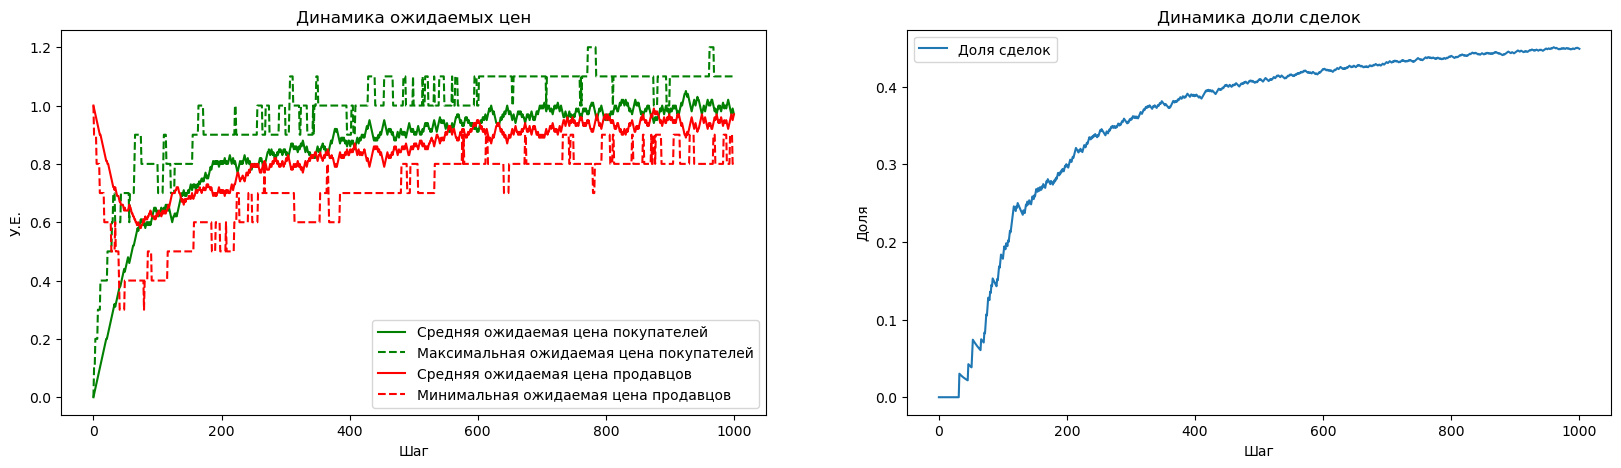

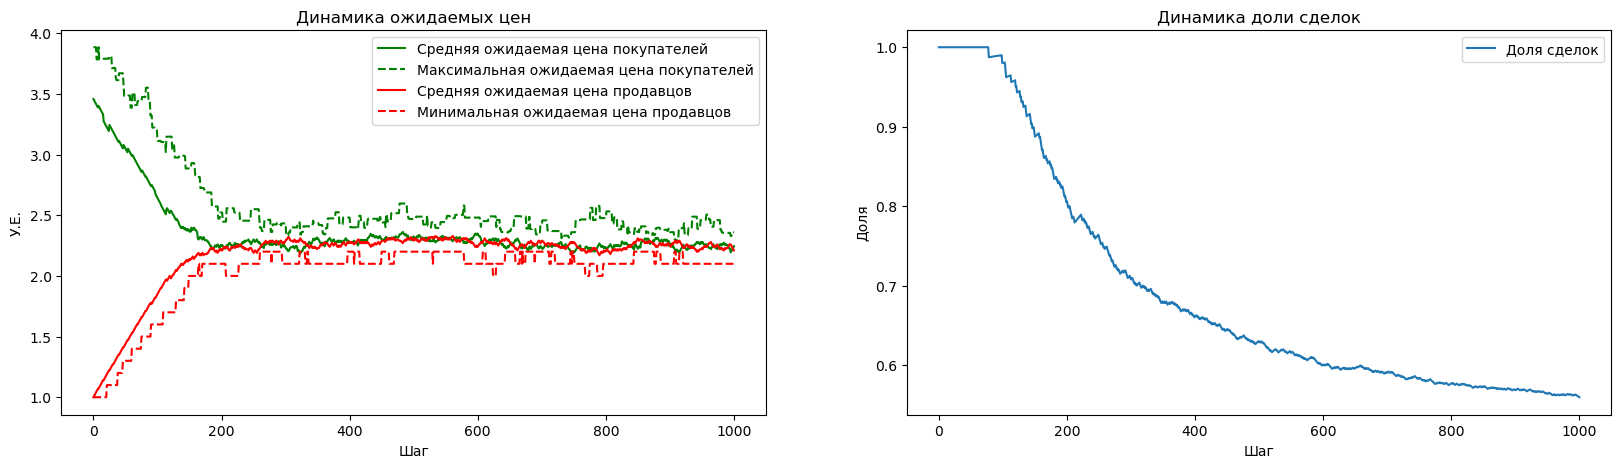

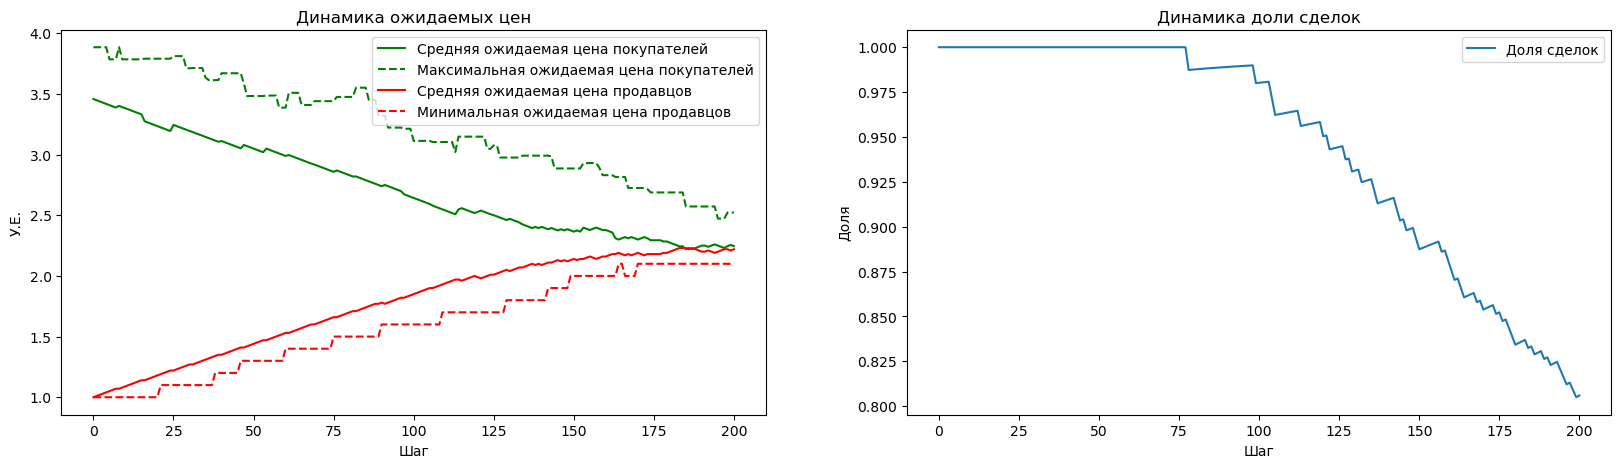

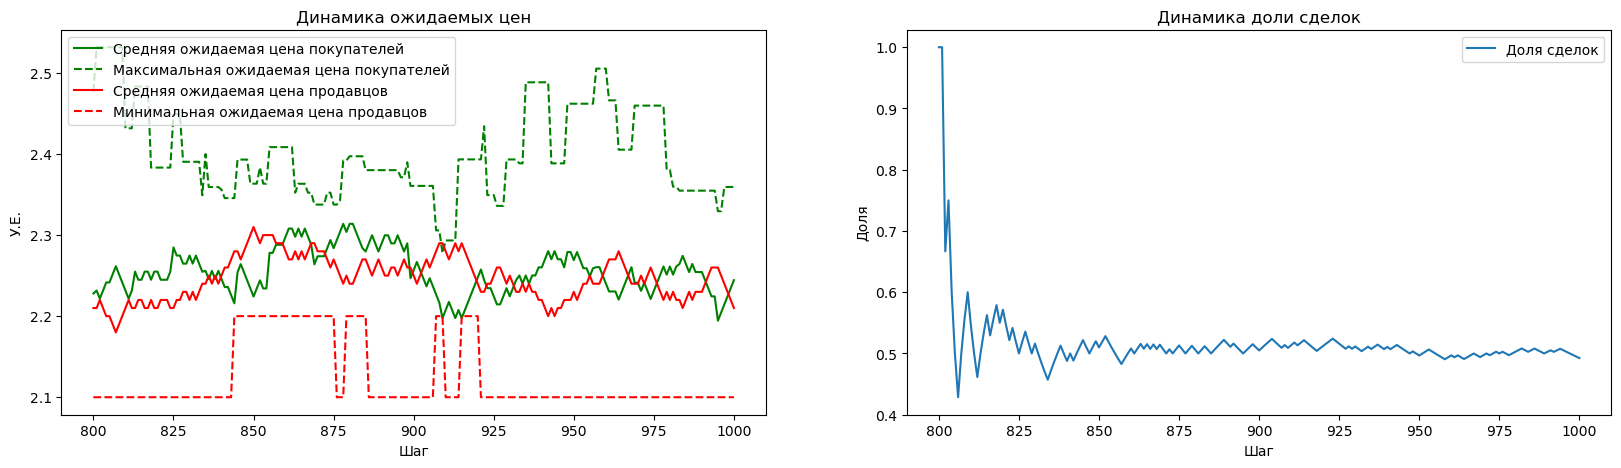

In [47]:
modified_model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 1000)
model.plot_dynamics(0, 200)
model.plot_dynamics(800, 1000)


##  Подробное описание модели

 
**Основные элементы модели:**

1. **Агенты:**
   - **Продавцы (`Seller`):**
     -  `min_price`: Минимальная цена, по которой продавец готов продать товар.
     -  `expect_price`: Ожидаемая цена продажи, корректируется в зависимости от успеха сделок.
     -  `delta`: Шаг изменения ожидаемой цены.
     -  `deals_today`: Количество сделок, совершенных продавцом в текущий день (максимум 1).
   - **Покупатели (`Consumer`):**
     -  `max_price`: Максимальная цена, которую покупатель готов заплатить.
     -  `expect_price`: Ожидаемая цена покупки, корректируется в зависимости от успеха сделок и стоимости портфеля акций.
     -  `delta`: Шаг изменения ожидаемой цены.
     -  `portfolio`: Список, содержащий количество акций `k` различных фирм, которыми владеет покупатель.
     -  `initial_stock_price`: Список, хранящий начальные цены акций `k` фирм.
     -  `deals_today`:  Количество сделок, совершенных покупателем в текущий день (максимум 1).

2. **Рынок (`Model_4`):**
   -  `num_of_consumers`: Количество покупателей.
   -  `num_of_sellers`: Количество продавцов.
   -  `consumer_min`,  `consumer_max`:  Интервал для генерации `max_price` покупателей.
   -  `consumer_delta`: Шаг изменения ожидаемой цены покупателя.
   -  `seller_min`, `seller_max`: Интервал для генерации  `min_price` продавцов.
   -  `seller_delta`: Шаг изменения ожидаемой цены продавца.
   -  `max_connections`: Максимальное количество попыток заключения сделки в день.
   -  `commission`: Комиссия сайта (в процентах от цены товара).
   -  `k`: Количество фирм, акции которых есть у покупателей.
   -  `initial_stock_price`: Список начальных цен акций `k` фирм. 
   -  `stock_prices`:  Список, хранящий историю цен акций `k` фирм для каждого покупателя. Используется для отслеживания динамики рынка акций.

**Работа модели:**

1. **Инициализация:** 
   -  Создаются объекты продавцов и покупателей со случайными начальными параметрами в заданных диапазонах. 
   -  Инициализируются цены акций `k` фирм для каждого покупателя.

2. **Моделирование дня (`day_run`):**
   -  Обнуляются счетчики сделок (`deals_today`) у всех агентов.
   -  **Обновление рынка акций (`update_stock_prices`):**
     -  Для каждого покупателя случайным образом изменяются цены акций в его портфеле.
     -  Ожидаемая цена покупателя (`expect_price`) корректируется в соответствии с изменением стоимости его портфеля.
   -  **Цикл заключения сделок:**
     - В течение дня происходит `max_connections` попыток заключения сделки.
     - На каждой итерации:
       - Случайно выбираются продавец и покупатель.
       - Проверяется, могут ли они совершить сделку (не превышен ли лимит сделок в день).
       - **Если сделка возможна (`deal`):**
         - Продавец случайным образом решает:
           - Платить комиссию самостоятельно и получить  `expect_price * (1 - commission)`.
           - Переложить комиссию на покупателя, увеличив цену до  `expect_price / (1 - commission)`. 
         - Сделка совершается, если:
           -  Покупатель готов заплатить итоговую цену (с учетом возможной комиссии).
           -  Цена продажи с учетом комиссии не ниже  `seller.min_price`.
         -  В зависимости от исхода сделки (`успех/неудача`), корректируются  `expect_price`  продавца и покупателя.

## Результаты моделирования и их интерпретация: 

 Модифицированная модель, учитывающая комиссию сайта и портфели акций покупателей, демонстрирует сложную динамику, которая отличается от базовой модели. Результаты зависят от выбранных параметров, и интерпретация требует тщательного анализа:

**1. Влияние комиссии сайта:**

  - **Рост средней цены товара:**  Введение комиссии, как правило, приводит к росту средней цены товара. Продавцы, перекладывающие комиссию на покупателей, напрямую увеличивают цену. Те же, кто платит комиссию сам, стремятся компенсировать потери, повышая `expect_price`, что также толкает цену вверх.
  - **Изменение количества сделок:**  Влияние на количество сделок неоднозначно и зависит от выбранных параметров и стратегий продавцов:
     -  **Снижение количества сделок:**  Возможно, если большая часть продавцов перекладывает комиссию на покупателей, и те не готовы платить более высокую цену. 
     -  **Незначительное влияние:**   Если продавцы в основном покрывают комиссию сами, стремясь сохранить привлекательность цены для покупателей.
     -  **Нелинейные эффекты:**   Возможны нелинейные эффекты, когда при определенных значениях комиссии и волатильности рынка количество сделок может даже увеличиваться. Например, если покупатели с высокими доходами (благодаря росту акций) готовы платить больше, это может компенсировать снижение спроса со стороны других покупателей.

  - **Стратегии продавцов:**   Модель позволяет наблюдать за распределением стратегий продавцов (платить комиссию самому или переложить на покупателя) в зависимости от параметров. Например, при высокой конкуренции и низкой комиссии продавцы могут чаще выбирать самостоятельную оплату, чтобы привлечь покупателей. 

**2. Влияние портфелей акций покупателей:**

  - **Волатильность цен:**  Колебания стоимости портфелей акций вносят дополнительную волатильность в динамику цен на товар. 
     -  Рост рынка акций: Покупательная способность покупателей растет, что может привести к росту `expect_price` и, как следствие, к росту цены товара.  
     -  Падение рынка акций:   Покупательная способность падает, что может привести к снижению  `expect_price`  и давлению на цену товара. 
  - **Неустойчивость рынка:**  Сильные колебания на рынке акций могут дестабилизировать рынок товара, приводя к периодам высокой активности (много сделок при росте цен) и периодам стагнации (мало сделок при падении цен).  
  - **Взаимосвязь рынков:**   Модель иллюстрирует взаимосвязь финансовых рынков и реального сектора экономики. 

**3. Взаимодействие факторов:**

  -  Наиболее интересные результаты наблюдаются при взаимодействии комиссии сайта и волатильности рынка акций. 
  -  Например, высокая комиссия на фоне падающего рынка акций может привести к резкому снижению количества сделок, так как покупатели становятся более чувствительны к цене. 
  -  В то же время, на растущем рынке акций влияние комиссии может быть менее заметным, так как покупатели готовы платить больше.

**4. Дополнительные выводы:**

  - **Зависимость от параметров:**  Результаты моделирования сильно зависят от выбранных параметров, таких как размер комиссии, волатильность рынка акций, интервалы цен для покупателей и продавцов, `max_connections`,  и др. Важно проводить многократные симуляции с разными параметрами, чтобы получить более полное представление о поведении модели.
  -  **Необходимость дальнейшего анализа:**   Представленные выводы носят общий характер. Для более глубокого понимания необходимо проводить количественный анализ данных, полученных в результате моделирования (например, средние цены, количество сделок, распределение стратегий продавцов) и исследовать их зависимость от параметров модели.

 


